## Data Wrangle:

### Gathering data 

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import wptools
import requests 
import tweepy
import json
import time
import datetime
from timeit import default_timer as timer 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### Twitter archive

In [2]:
#Import twitter-archive-enhances dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#view first 5 rows of twitter-archive-enhanced.csv 
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Image predictions

In [4]:
#Import image-predictions.tsv file from udacity server using request
url = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(url.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
            

In [5]:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Tweet json

In [6]:
#Twitter access keys
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_SECRET = ''

#Twitter API setup
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [7]:
#Setting twitter API
api = twitter_setup()
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810

Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080: 739238157791694849
Fail
1081:

Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354: 703769065844768768
Fail
1355:

Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Fail
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
1617: 685198997565345792
Fail
1618: 685169283572338688
Fail
1619: 684969860808454144
Fail
1620: 684959798585110529
Fail
1621: 684940049151070208
Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626: 684830982659280897
Fail
1627: 684800227459624960
Fail
1628: 684594889858887680
Fail
1629: 684588130326986752
Fail
1630:

Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Fail
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
Fail
1889: 674781762103414784
Fail
1890: 674774481756377088
Fail
1891: 674767892831932416
Fail
1892: 674764817387900928
Fail
1893: 674754018082705410
Fail
1894: 674752233200820224
Fail
1895: 674743008475090944
Fail
1896: 674742531037511680
Fail
1897: 674739953134403584
Fail
1898: 674737130913071104
Fail
1899: 674690135443775488
Fail
1900: 674670581682434048
Fail
1901: 674664755118911488
Fail
1902: 674646392044941312
Fail
1903: 674644256330530816
Fail
1904: 674638615994089473
Fail
1905:

Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164: 669375718304980992
Fail
2165: 669371483794317312
Fail
2166: 669367896104181761
Fail
2167: 669363888236994561
Fail
2168: 669359674819481600
Fail
2169: 669354382627049472
Fail
2170: 669353438988365824
Fail
2171: 669351434509529089
Fail
2172: 669328503091937280
Fail
2173: 669327207240699904
Fail
2174: 669324657376567296
Fail
2175: 669216679721873412
Fail
2176: 669214165781868544
Fail
2177: 669203728096960512
Fail
2178: 669037058363662336
Fail
2179: 669015743032369152
Fail
2180:

In [8]:
#Read tweet_json.txt file 
columns = ['id', 'favorite_count', 'retweet_count']

data = []
with open('tweet_json.txt', 'r') as file: 
    json_line = file.readline()
    while json_line:
        line = json.loads(json_line)
        row = dict((k, line[k]) for k in columns)
        data.append(row)
        json_line = file.readline()
        
#Convert the dictionary to dataframe
tweets = pd.DataFrame.from_dict(data)
display(tweets.head())

,favorite_count,id,retweet_count
0,37989,892420643555336193,8303
1,32614,892177421306343426,6130
2,24559,891815181378084864,4059
3,41321,891689557279858688,8442
4,39503,891327558926688256,9148


# Asses

## Visual assessment
### - Twitter archive

In [9]:
#View the first 20 recoreds 
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#View the last 20 recoreds 
twitter_archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [11]:
#View a random sample of 20 
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
718,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783466772...,11,10,Finn,None,None,None,None
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
2284,667192066997374976,NaN,NaN,2015-11-19 04:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*takes several long deep breaths* omg omg oMG ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667192066...,12,10,None,None,None,None,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
1458,695074328191332352,NaN,NaN,2016-02-04 02:40:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorenzo. He's educated af. Just gradua...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695074328...,11,10,Lorenzo,None,None,pupper,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kyro. He's a Stratocumu...,8.092201e+17,4.196984e+09,2016-12-15 02:14:29 +0000,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,None,None,None,None
838,767500508068192258,NaN,NaN,2016-08-21 23:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's making quite a h*ckin mess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767500508...,12,10,Louie,None,None,None,None
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
255,844223788422217728,NaN,NaN,2017-03-21 16:26:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Margo. She just dug pup a massive hole...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844223788...,12,10,Margo,None,None,None,None


### - Image predictions

In [12]:
#View the first 20 recoreds 
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
#View the last 20 recoreds 
image_predictions.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [14]:
#View a random sample of 20 
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,Chesapeake_Bay_retriever,0.194897,True,American_Staffordshire_terrier,0.059471,True
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
833,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796,True,Norwegian_elkhound,0.154770,True,schipperke,0.080802,True
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True
1274,750041628174217216,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,1,Labrador_retriever,0.252031,True,Maltese_dog,0.188090,True,golden_retriever,0.133017,True


### - Twitter json

In [15]:
#View the first 20 recoreds 
tweets.head(20)

,favorite_count,id,retweet_count
0,37989,892420643555336193,8303
1,32614,892177421306343426,6130
2,24559,891815181378084864,4059
3,41321,891689557279858688,8442
4,39503,891327558926688256,9148
5,19852,891087950875897856,3042
6,11604,890971913173991426,2015
7,64074,890729181411237888,18409
8,27262,890609185150312448,4178
9,31279,890240255349198849,7200


In [16]:
#View the last 20 recoreds 
tweets.tail(3)

,favorite_count,id,retweet_count
883,6871,759047813560868866,2178
884,3745,758854675097526272,963
885,11794,758828659922702336,4132


In [17]:
#View a random sample of 20 
tweets.sample(20)

,favorite_count,id,retweet_count
228,7255,847617282490613760,447
598,21361,797236660651966464,7265
131,52365,866334964761202691,14469
2,24559,891815181378084864,4059
371,7814,827600520311402496,1025
821,11549,768193404517830656,3832
18,19437,888554962724278272,3463
452,0,817502432452313088,3698
66,16473,879376492567855104,3050
177,16452,856543823941562368,2952


## Programmatic assessment
### - Twitter archive

In [18]:
#View the dataset info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
#Check for duplicates in the data 
sum(twitter_archive.duplicated())

0

In [20]:
#Check for null values
twitter_archive.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

### - Image predictions

In [21]:
#View the dataset info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Check for duplicates in the data 
sum(image_predictions.duplicated())

0

In [23]:
#Check for null values
image_predictions.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

### - Twitter json

In [24]:
#View the dataset info
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 3 columns):
favorite_count    886 non-null int64
id                886 non-null int64
retweet_count     886 non-null int64
dtypes: int64(3)
memory usage: 20.8 KB


In [25]:
#Check for duplicates in the data 
sum(tweets.duplicated())

0

In [26]:
#Check for null values
tweets.isnull().any()

favorite_count    False
id                False
retweet_count     False
dtype: bool

# Summary of findings :

### Quality 
#### - Twitter archive 
- The tweet_id as well as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id data type needs to be string.
- Timestamp and retweeted_status_timestamp data type needs to be timestamp.
- expanded_urls has only 2297 entries, so we don't have image url for 59 entries, delete those records.
- name column has irrelevant entries ( letter a instead of names)
- Drop unnecessary columns such as source, in_reply_to_status_id, in_reply_to_user_id, expanded_urls, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

#### - Image prediction
- Remove false predictions for dogs.
- Extract breed from the p1, p2, and p3. 
- Convert the values of p1,p2, and p3 to lowercase letters.
- Rename column names to more readable names.

### Tidiness 
- Create a categorical attribute of dog_stage which contains  doggo, floofer, pupper, puppo.
- Merge the three datasets in one dataframe.

# Clean 

## Twitter archive

In [27]:
#Copy dataset
clean_twitter_archive = twitter_archive.copy()

### Change data types 

In [28]:
#Change the data types 
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)
clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(clean_twitter_archive.retweeted_status_timestamp)
clean_twitter_archive.tweet_id = clean_twitter_archive.astype(str)
clean_twitter_archive.in_reply_to_status_id = clean_twitter_archive.in_reply_to_status_id.astype(str)
clean_twitter_archive.in_reply_to_user_id= clean_twitter_archive.in_reply_to_user_id.astype(str)
clean_twitter_archive.source = clean_twitter_archive.source.astype(str)
clean_twitter_archive.retweeted_status_id = clean_twitter_archive.retweeted_status_id.astype(str)
clean_twitter_archive.retweeted_status_user_id = clean_twitter_archive.retweeted_status_user_id.astype(str)
clean_twitter_archive.name = clean_twitter_archive.name.astype(str)

#View changes
clean_twitter_archive.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Delete urls with no images from expended_urls

In [29]:
#Delete null values for the expended_urls 
#View nulls
clean_twitter_archive[clean_twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.86266357075e+17,2281181600.0,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,nan,nan,NaT,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.81607037314e+17,47384430.0,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,nan,nan,NaT,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.79553827334e+17,3105440746.0,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,nan,nan,NaT,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.70726202742e+17,16487760.0,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,nan,nan,NaT,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.63425645569e+17,77596200.0,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,nan,nan,NaT,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.57156678055e+17,180670967.0,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,nan,nan,NaT,NaN,12,10,None,None,None,None,None
185,856330835276025856,nan,nan,2017-04-24 02:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.56330158768e+17,66699013.0,2017-04-24 02:13:14,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.5628600411e+17,279280991.0,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,nan,nan,NaT,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.55861584463e+17,194351775.0,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaT,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.55858535607e+17,13615722.0,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,nan,nan,NaT,NaN,666,10,None,None,None,None,None


In [30]:
#Delete the a.m records
clean_twitter_archive.dropna(subset=['expanded_urls'], inplace=True)

In [31]:
#Check deletion
clean_twitter_archive.expanded_urls.isnull().sum()

0

### Irrelevant names in the name column

In [32]:
#Create a function to extract names and remove irrlevent names
def extract_name(row):
    words = row['text'].split()
    name = 'None'
    if 'named' in words:
        name = words[words.index('named') + 1]
    elif row['text'].startswith('This is ') and words[row['text'].index('This is') + 2] != 'a' and words[row['text'].index('This is') + 2] != 'an':
        name = words[row['text'].index('This is') + 2]
    elif row['text'].startswith('Say hello to'):
        name = words[row['text'].index('Say hello to') + 3]
    elif 'Meet' in words:
        name = words[words.index('Meet') + 1]
    row['name'] = name.replace('.','')
    return row
    
clean_twitter_archive = clean_twitter_archive.apply(extract_name, axis=1)

In [33]:
#VView changes
clean_twitter_archive.name.value_counts()

None         845
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Winston        9
Lola           9
Tucker         9
Penny          9
Sadie          8
Daisy          7
Bella          6
Oscar          6
Jax            6
Toby           6
Bo             6
Bailey         6
Stanley        6
Koda           6
Leo            5
Louis          5
Milo           5
the            5
Buddy          5
Bentley        5
Scout          5
Chester        5
Rusty          5
Sammy          5
Jack           5
            ... 
Willow         1
Iggy           1
Spencer        1
Davey          1
Gilbert        1
Bobby          1
Jim            1
Jaycob         1
Dunkin         1
Taco           1
Bones          1
Jebberson      1
Spark          1
Ralph          1
Bauer          1
River          1
Lilli          1
Einstein       1
Keet           1
Alphred        1
Clybe          1
this           1
Sky            1
Bruiser        1
Dex            1
Henry          1
Diogi          1
Barclay       

### Remove unwanted columns from the dataset 

In [34]:
#Delete unnecessary columns 
clean_twitter_archive = clean_twitter_archive.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [35]:
#View changes
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Image predictions

In [36]:
#Copy data 
clean_image_predictions = image_predictions.copy()

In [58]:
#View data
clean_image_predictions.head(20)

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_prediction_is_true,second_prediction,second_prediction_confidence,second_prediction_is_true,third_prediction,third_prediction_confidence,third_prediction_is_true,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True,golden_retriever


###  Remove false predictions for dogs


In [38]:
#Find tweet_id of images where probablity of any is false
delete_false_prob = clean_image_predictions[(clean_image_predictions["p1_dog"] == False) &
                     (clean_image_predictions["p2_dog"] == False) &
                     (clean_image_predictions["p3_dog"] == False)]["tweet_id"].index

#Remove tweets where all probabilities of p_dog are False
clean_image_predictions.drop(delete_false_prob, inplace=True)

In [39]:
#View changes
clean_image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


### Convert the values of p1,p2, and p3 to lowercase letters.

In [40]:
#Converting to lowercase
clean_image_predictions.p1 = clean_image_predictions.p1.str.lower()
clean_image_predictions.p2 = clean_image_predictions.p2.str.lower()
clean_image_predictions.p3 = clean_image_predictions.p3.str.lower()

In [41]:
#View changes
clean_image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True


### Rename columns header

In [42]:
#Rename headers with new readable names
clean_image_predictions = clean_image_predictions.rename(columns= {
    'p1':'first_prediction',
    'p1_conf': 'first_prediction_confidence',
    'p1_dog': 'first_prediction_is_true',
    'p2':'second_prediction',
    'p2_conf': 'second_prediction_confidence',
    'p2_dog': 'second_prediction_is_true',
    'p3':'third_prediction',
    'p3_conf': 'third_prediction_confidence',
    'p3_dog': 'third_prediction_is_true'
})

In [43]:
#View changes
clean_image_predictions.head(3)

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_prediction_is_true,second_prediction,second_prediction_confidence,second_prediction_is_true,third_prediction,third_prediction_confidence,third_prediction_is_true
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Extract breed 

In [44]:
#Create a new column
clean_image_predictions['breed'] = ''

#create a function to extract breed when prediction is true
def extract_breed(row):
    if row.first_prediction_is_true:
        row.breed = row.first_prediction
    elif row.second_prediction_is_true:
        row.breed = row.second_prediction
    elif row.third_prediction_is_true:
        row.breed = row.third_prediction
    else:
        row.breed= 'N/A'
    return row

In [45]:
#Assign extracted breed to breed column
clean_image_predictions = clean_image_predictions.apply(extract_breed, axis= 1)

In [46]:
#View changes
clean_image_predictions.tail(20)

,tweet_id,jpg_url,img_num,first_prediction,first_prediction_confidence,first_prediction_is_true,second_prediction,second_prediction_confidence,second_prediction_is_true,third_prediction,third_prediction_confidence,third_prediction_is_true,breed
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,french_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,french_bulldog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,pembroke,0.809197,True,rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,pembroke
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,siberian_husky,0.700377,True,eskimo_dog,0.166511,True,malamute,0.111411,True,siberian_husky
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,labrador_retriever,0.184172,True,english_setter,0.073482,True,golden_retriever
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,tibetan_mastiff,0.120184,True,labrador_retriever,0.105506,True,golden_retriever
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,saluki,0.027351,True,whippet
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True,golden_retriever
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,french_bulldog,0.991650,True,boxer,0.002129,True,staffordshire_bullterrier,0.001498,True,french_bulldog
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True,pembroke
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,french_bulldog,0.377417,True,labrador_retriever,0.151317,True,muzzle,0.082981,False,french_bulldog


## Tidiness

### Create a categorical attribute of dog_stage which contains  doggo, floofer, pupper, puppo.

In [47]:
#Create the dog_stage column
clean_twitter_archive['dog_stage'] = 'None'

#Create a function for the categorical column
def convert_to_column(row):
    row.dog_stage = 'NA'
    temp = []
    if(row.doggo!='None'):
        temp.append('Doggo')
    elif(row.floofer != 'None'):
        temp.append('Floofer')
    elif(row.pupper!='None'):
        temp.append('Pupper')
    elif(row.puppo != 'None'):
        temp.append('Puppo')
    else:
        temp.append('Other')
    if(len(temp) >1):
        row.dog_stage = 'Mulitple'
    else:
        row.dog_stage = temp[0]
    return row

In [48]:
#Apply function 
clean_twitter_archive = clean_twitter_archive.apply(convert_to_column, axis=1)

In [49]:
#Drop the previous columns
clean_twitter_archive = clean_twitter_archive.drop(['doggo', 'floofer', 'pupper','puppo'], axis=1)

In [50]:
#View changes
clean_twitter_archive.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,Other
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,Other
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Other
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,Other
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,Other
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,Other
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,Other
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,Other
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,Other
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,Doggo


### Merging three datasets together in one dataframe

In [51]:
#Save the clean dataframes to csv files in order to merge them together
clean_image_predictions.to_csv('./clean_image_predictions.csv', index=False)
clean_twitter_archive.to_csv('./clean_twitter_archive.csv', index=False)

In [52]:
#Import the clean .csv files 
df1 = pd.read_csv('clean_twitter_archive.csv')
df2 = pd.read_csv('clean_image_predictions.csv')

In [53]:
#Merging twitter archive and image predictions
dataframe =  pd.merge(df1, df2, how= 'left')
dataframe.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,first_prediction,first_prediction_confidence,first_prediction_is_true,second_prediction,second_prediction_confidence,second_prediction_is_true,third_prediction,third_prediction_confidence,third_prediction_is_true,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,Other,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Other,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,Other,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,Other,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset


In [54]:
#Merging the three dataframes 
final_df = pd.merge(dataframe,tweets, left_on='tweet_id', right_on='id')
final_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,first_prediction,...,second_prediction,second_prediction_confidence,second_prediction_is_true,third_prediction,third_prediction_confidence,third_prediction_is_true,breed,favorite_count,id,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37989,892420643555336193,8303
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,Other,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,32614,892177421306343426,6130
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Other,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,24559,891815181378084864,4059
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,Other,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever,41321,891689557279858688,8442
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,Other,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,39503,891327558926688256,9148


In [55]:
#Save final dataset to a .csv file
final_df.to_csv('./finaldatafrane.csv', index=False)

# Explore and visualize the data

## Find the top 5 retweeted dog breed

Text(0,0.5,'Number of retweets')

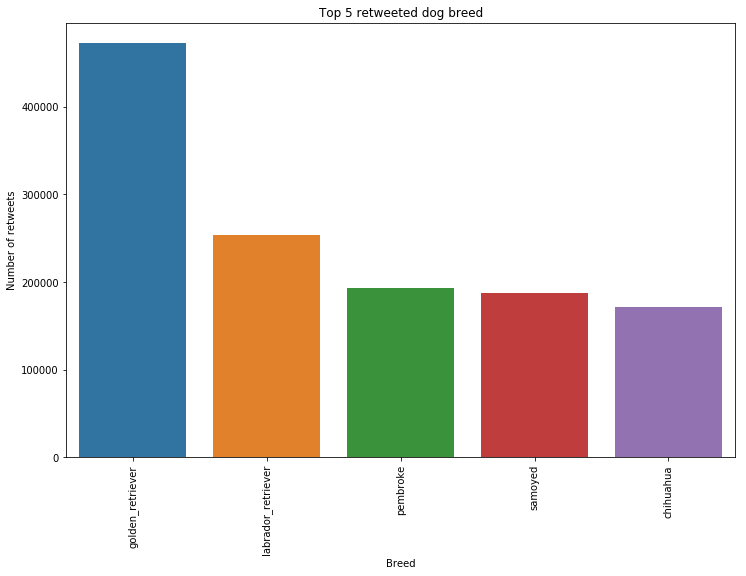

In [56]:
#Find the sum of likes
retweet_count = dict(final_df.groupby(['breed']).retweet_count.sum().sort_values(ascending = False)[0:5])
#Plotting the top 5 retweeted dog breed 
fig, ax =plt.subplots(figsize=(12,8))
sns.barplot(x= list(retweet_count.keys()), y=list(retweet_count.values()))
plt.xticks(rotation=90);
plt.title('Top 5 retweeted dog breed')
plt.xlabel('Breed')
plt.ylabel('Number of retweets')

## Find top 5 liked dog breed

Text(0,0.5,'Number of likes')

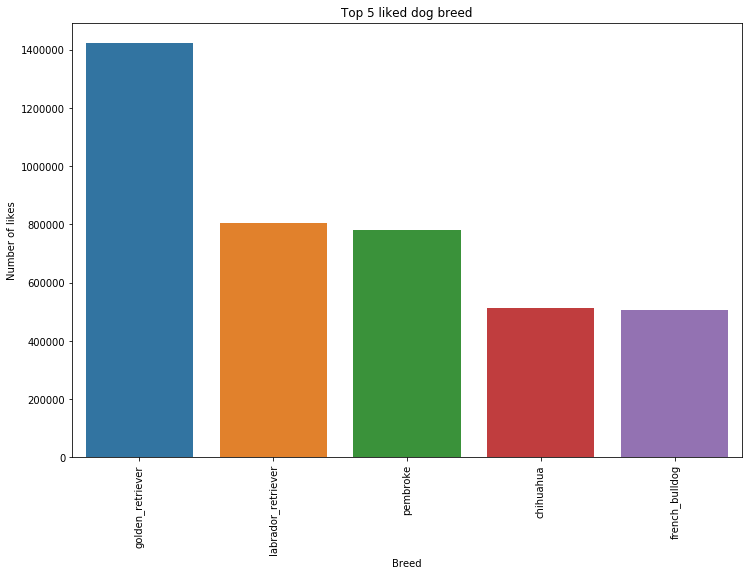

In [57]:
#Find the sum of likes
like_count = dict(final_df.groupby(['breed']).favorite_count.sum().sort_values(ascending = False)[0:5])
#Plotting the top 5 retweeted dog breed 
fig, ax =plt.subplots(figsize=(12,8))
sns.barplot(x= list(like_count.keys()), y=list(like_count.values()))
plt.xticks(rotation=90);
plt.title('Top 5 liked dog breed')
plt.xlabel('Breed')
plt.ylabel('Number of likes')